# Under the hood: How we infer the radial brightness profile

The goal of this tutorial is to provide insight into how frank works. We will step you through the core concepts to provide an understanding of how the inferred radial brightness profile is determined from the visibilities. These concepts are:

 - The model relationship between the brightness and the visibility points
 - Why a naive inference of the brightness profile does not work and the need for regularization
 - How frank does this regularization
 - How the model's parameters affects the fit.
 
 This outline of this tutorial follows Section 2 of the frank methods paper.

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## The visibility model: a discrete Hankel Transform

The starting point for our model is the assumption of an axisymmetric source positioned at the phase centre of the observations and the visibilitiles are already calibrated, such that they can be approximated by the Fourier transform of the brightness,
\begin{equation}
    V_\nu(u,v)=\iint I_\nu (x,y)\ \exp[-2 \pi i (u x + v y)]\ {\rm d}x {\rm d}y.
\end{equation}

For a discussion of the assumptions behind this see, e.g. ???. We further make the assumption that our source is axisymmetric, i.e. $I_\nu (x,y) \equiv I_\nu(r)$. In this case, the equation for the visibility can be reduced to a Hankel Transform,
\begin{equation}
  V_\nu(q) = \int I_\nu(r) J_0(2 \pi q r) 2 \pi r\ {\rm d} r,
\end{equation}
where $q= \sqrt{u^2 + v^2}$ and $J_0$ is a Bessel function (of the first kind). The inverse of a Hankel transform is also a Hankel Transform,
\begin{equation}
  I_\nu(q) = \int V_\nu(q) J_0(2 \pi q r) 2 \pi q\ {\rm d} q.
\end{equation}
These equations show that the contribution to the brightness at a given point 

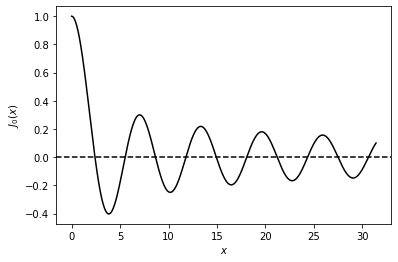

In [15]:
from scipy.special import j0
x = np.linspace(0, 10*np.pi, 10**3)
plt.plot(x, j0(x), 'k')
plt.axhline(0, ls='--', c='k')
plt.xlabel('$x$')
plt.ylabel('$J_0(x)$')
None

## Zeroth step: Import the main frank library

In [ ]:
# F

In [3]:
u,v,Vis,weights = frank.io.load_uvtable('multi_ring_C43_6.txt.bz2')

weights = frank.utilities.estimate_weights(u, v, Vis, use_median=True)
print("Estimated weights:", weights.mean())

def model_profile(r):
    
    def gauss(a, b, c):
        return a * np.exp( - 0.5*(r-b)**2 / c**2)
    
    norm = 1e10
    
    # Add the symmetric Gaussians
    a = [0.60, -0.40, -0.30]
    b = [0.70, 0.60, 0.85]
    c = [0.20, 0.05, 0.05]
    
    I = sum([gauss(a,b,c) for a, b, c in zip(a,b,c)])
    
    # Add the non-symmetric Gaussian:
    I += gauss(1, 0.15, 0.05) * (r <= 0.15)
    I += gauss(1, 0.15, 0.10) * (r >  0.15)
    
    return norm * I

Estimated weights: 13480.54760698165


NameError: name 'Rmax' is not defined

In [ ]:
geometry = FixedGeometry(0.,0.,0.,0.)

In [ ]:
FF = FrankFitter(Rmax, Num_cells, geometry, alpha=1.05, weights_smooth=1e-4)
sol = FF.fit(u,v,Vis, weights)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(sol.r, sol.mean)
plt.plot(r_pts, model_profile(r_pts), 'k')
plt.xlabel('Radius [arcsec]')
plt.ylabel('Intensity [Jy/Sr]')